# Matplotlib 数据可视化

本讲义将详细介绍使用 Python 的 Matplotlib 工具实现数据可视化的方法。

 Matplotlib 是建立在 NumPy 数组基础上的多平台数据可视化程序库，最初被设计用于完善 SciPy 的生态环境。John Hunter 在 2002 年提出了 Matplotlib 的构思——希望通过一个 IPython 的补丁，让IPython 命令行可以用 gnuplot 画出类似 MATLAB 风格的交互式图形。但那时 IPython 的作者 Fernando Perez 正忙着写博士论文，就对 John 说自己最近几个月都没时间审核补丁。John 倒觉得是个机会，就把补丁做成了 Matplotlib 程序包，于 2003 年发布了 0.1 版。后来，美国太空望远镜科学研究所（Space Telescope Science Institute，STScI，哈勃望远镜背后的团队，位于约翰霍普金斯大学）选择它作为了画图程序包，并一直为 Matplotlib 开发团队提供资金支持，从而大大扩展了 Matplotlib 的功能。Matplotlib 最重要的特性之一就是具有良好的操作系统兼容性和图形显示底层接口兼容性（graphics backend）。Matplotlib 支持几十种图形显示接口与输出格式，这使得用户无论在哪种操作系统上都可以输出自己想要的图形格式。这种跨平台、面面俱到的特点已经成为Matplotlib 最强大的功能之一，Matplotlib 也因此吸引了大量用户，进而形成了一个活跃的开发者团队，晋升为 Python 科学领域不可或缺的强大武器。
 
 然而近几年，Matplotlib 的界面与风格似乎有点跟不上时代。新的画图工具，如 R 语言中的 ggplot 和 ggvis，都开始使用 D3js 和 HTML5 canvas 构建的网页可视化工具。相比之下，Matplotlib 更显沧桑。但我觉得我们仍然不能放弃 Matplotlib 这样一个功能完善、跨平台的画图引擎。目前，新版的 Matplotlib 已经可以轻松实现主流的绘图风格，人们不断在 Matplotlib 的基础上开发出新的程序包，实现更加简洁、现代化的API，例如 Seaborn、ggplot（http://yhat.github.io/ggplot）、HoloViews（http://holoviews.org）、Altair（http://altair-viz.github.io），以及 Pandas 对 Matplotlib 的 API封装的画图功能。虽然已经有了封装后的高级工具，但是掌握 Matplotlib 的语法更能让你灵活地控制最终的图形结果。因此，即使新工具的出现说明社区正在逐渐放弃直接使用底层的 Matplotlib API 画图的做法，但我依然觉得 Matplotlib 是数据可视化技术中不可或缺的一环。

## General Matplotlib Tips

在深入学习 Matplotlib 数据可视化的功能之前，你需要知道几个 Matplotlib 的使用技巧。

### Importing Matplotlib

就像用 np 作为 NumPy 的简写形式、pd 作为 Pandas 的简写形式一样，我们也可以在导入 Matplotlib 时用一些它常用的简写形式：

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt 是最常用的接口，在本章后面的内容中会经常用到。

### Setting Styles

我们将使用 plt.style 来选择图形的绘图风格。现在选择经典（classic）风格，这样画出的图就都是经典的 Matplotlib 风格了：

In [2]:
plt.style.use('classic')

在后面的内容中，我们将根据需要调整绘图风格。Matplotlib 在 1.5 版之后开始支持不同的风格列表（stylesheets）。如果你用的 Matplotlib 版本较旧，那么就只能使用默认的绘图风格。

### ``show()`` or No ``show()``? How to Display Your Plots

如果数据可视化图不能被看见，那就一点儿用也没有了。但如何显示你的图形，就取决于具体的开发环境了。Matplotlib 的最佳实践与你使用的开发环境有关。简单来说，就是有三种开发环境，分别是脚本、IPython shell 和 IPython Notebook。

#### Plotting from a script

如果你在一个脚本文件中使用 Matplotlib，那么显示图形的时候必须使用 plt.show()。plt.
show() 会启动一个事件循环（event loop），并找到所有当前可用的图形对象，然后打开一
个或多个交互式窗口显示图形。

例如，你现在有一个名为 myplot.py 的文件，代码如下所示：

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

你可以从命令行工具中执行这个脚本，然后会看到一个新窗口，里面会显示你的图形：

```
$ python myplot.py
```

plt.show() 这行代码在后面完成了许多事情，它需要与你使用的操作系统的图形显示接
口进行交互。虽然具体的操作细节会因操作系统和安装过程不同而有很大的差异，但是
Matplotlib 为你隐藏了所有的细节，非常省心。

不过有一点需要注意，一个 Python 会话（session）中只能使用一次 plt.show()，因此通常
都把它放在脚本的最后。多个 plt.show() 命令会导致难以预料的显示异常，应该尽量避免。

#### Plotting from an IPython shell

 IPython shell 中交互式地使用 Matplotlib 画图非常方便，在
IPython 启动 Matplotlib 模式就可以使用它。为了启用这个模式，你需要在启动 ipython 后
使用 %matplotlib 魔法命令：

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

此后的任何 plt 命令都会自动打开一个图形窗口，增加新的命令，图形就会更新。有一
些变化（例如改变已经画好的线条属性）不会自动及时更新；对于这些变化，可以使用
plt.draw() 强制更新。在 IPython shell 中启动 Matplotlib 模式之后，就不需要使用 plt.
show() 了。

#### Plotting from an IPython notebook

IPython Notebook 是一款基于浏览器的交互式数据分析工具，可以将描述性文字、代码、
图形、HTML 元素以及更多的媒体形式组合起来，集成到单个可执行的 Notebook 文档中。

用 IPython Notebook 进行交互式画图与使用 IPython shell 类似，也需要使用 %matplotlib 命
令。你可以将图形直接嵌在 IPython Notebook 页面中，有两种展现形式。

- %matplotlib notebook 会在 Notebook 中启动交互式图形。
- %matplotlib inline 会在 Notebook 中启动静态图形。

本节统一使用 ``%matplotlib inline``:

In [3]:
%matplotlib inline

运行命令之后（每一个 Notebook 核心任务 / 会话只需要运行一次），在每一个 Notebook 的
单元中创建图形就会直接将 PNG 格式图形文件嵌入在单元中

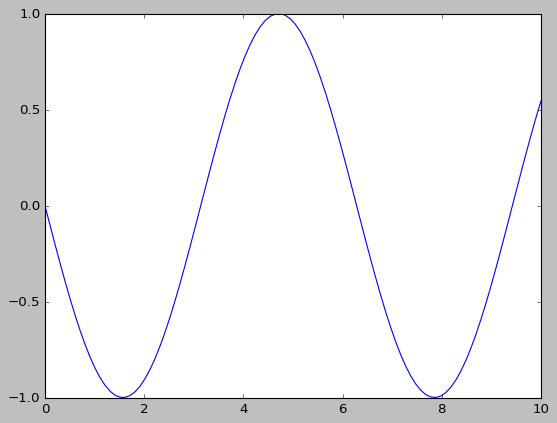

In [15]:
import numpy as np
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, -np.sin(x), '-')

### Saving Figures to File

Matplotlib 的一个优点是能够将图形保存为各种不同的数据格式。你可以用 savefig() 命令
将图形保存为文件。例如，如果要将图形保存为 PNG 格式，你可以运行这行代码：

In [16]:
fig.savefig('my_figure.png')

In [17]:
!ls -lh my_figure.png

'ls' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


为了确定文件中是否保存有我们需要的内容，可以用 IPython 的 Image 对象来显示文件内容

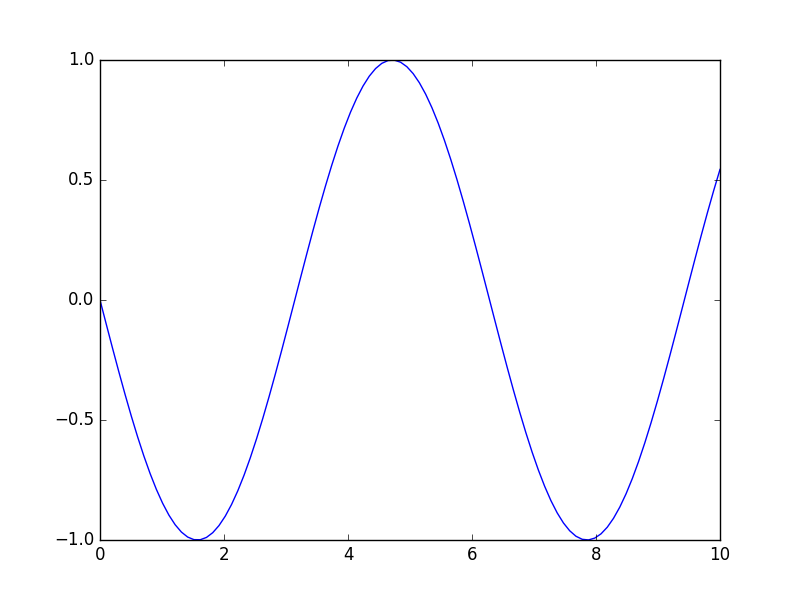

In [18]:
from IPython.display import Image
Image('my_figure.png')

在 savefig() 里面，保存的图片文件格式就是文件的扩展名。Matplotlib 支持许多图形格
式，具体格式由操作系统已安装的图形显示接口决定。你可以通过 canvas 对象的方法查看
系统支持的文件格式：

In [19]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

需要注意的是，当你保存图形文件时，不需要使用 plt.show() 或者前面介绍过的命令

## Two Interfaces for the Price of One

不过 Matplotlib 有一个容易让人混淆的特性，就是它的两种画图接口：一个是便捷的
MATLAB 风格接口，另一个是功能更强大的面向对象接口。下面来快速对比一下两种接
口的主要差异。

#### MATLAB-style Interface

Matplotlib 最初作为 MATLAB 用户的 Python 替 代 品， 许 多 语 法 都 和 MATLAB 类 似。
MATLAB 风格的工具位于 pyplot（plt）接口中。MATLAB 用户肯定对下面的代码特别熟悉

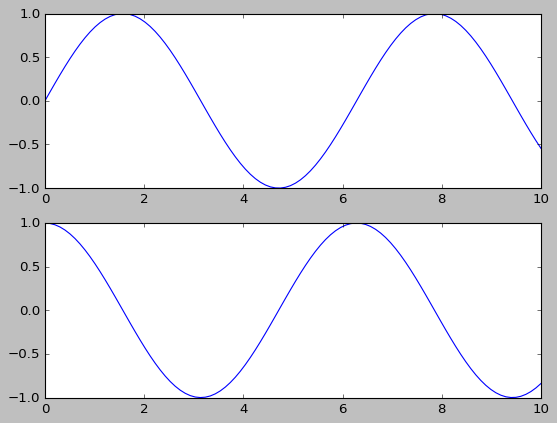

In [20]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

这种接口最重要的特性是有状态的（stateful）：它会持续跟踪“当前的”图形和坐标轴，
所有 plt 命令都可以应用。你可以用 plt.gcf()（获取当前图形）和 plt.gca()（获取当前
坐标轴）来查看具体信息。

虽然这个有状态的接口画起图来又快又方便，但是也很容易出问题。例如，当创建上面的
第二个子图时，怎么才能回到第一个子图，并增加新内容呢？虽然用 MATLAB 风格接口
也能实现，但未免过于复杂，好在还有一种更好的办法！

#### Object-oriented interface

面向对象接口可以适应更复杂的场景，更好地控制你自己的图形。在面向对象接口中，画
图函数不再受到当前“活动”图形或坐标轴的限制，而变成了显式的 Figure 和 Axes 的方 法。通过下面的代码，可以用面向对象接口重新创建之前的图形

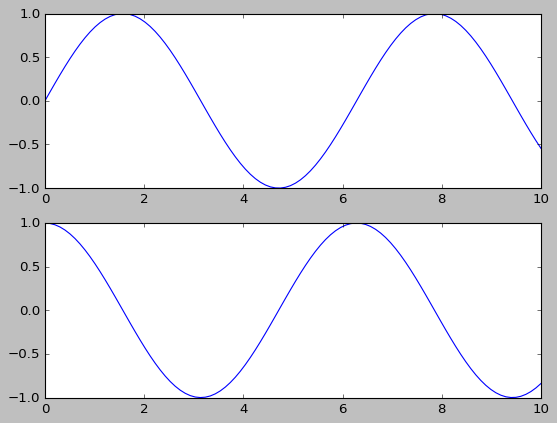

In [22]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

虽然在画简单图形时，选择哪种绘图风格主要看个人喜好，但是在画比较复杂的图形时，
面向对象方法会更方便。在本章中，我们将在 MATLAB 风格接口与面向对象接口间来回
转换，具体内容根据实际情况而定。在绝大多数场景中，plt.plot() 与 ax.plot() 的差异
非常小。

# Simple Line Plots

在所有图形中，最简单的应该就是线性方程 y = f (x) 的可视化了。来看看如何创建这个简
单的线形图。接下来的内容都是在 Notebook 中画图，因此需要导入以下命令：

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

要画 Matplotlib 图形时，都需要先创建一个图形 fig 和一个坐标轴 ax。创建图形与坐标轴
的最简单做法如下所示

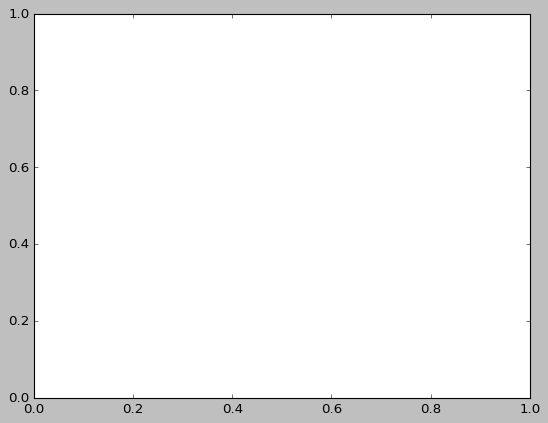

In [24]:
fig = plt.figure()
ax = plt.axes()

在 Matplotlib 里面，figure（plt.Figure 类的一个实例）可以被看成是一个能够容纳各种坐
标轴、图形、文字和标签的容器。就像你在图中看到的那样，axes（plt.Axes 类的一个实
例）是一个带有刻度和标签的矩形，最终会包含所有可视化的图形元素。在本书中，我们
通常会用变量 fig 表示一个图形实例，用变量 ax 表示一个坐标轴实例或一组坐标轴实例。
创建好坐标轴之后，就可以用 ax.plot 画图了。从一组简单的正弦曲线（sinusoid）开始

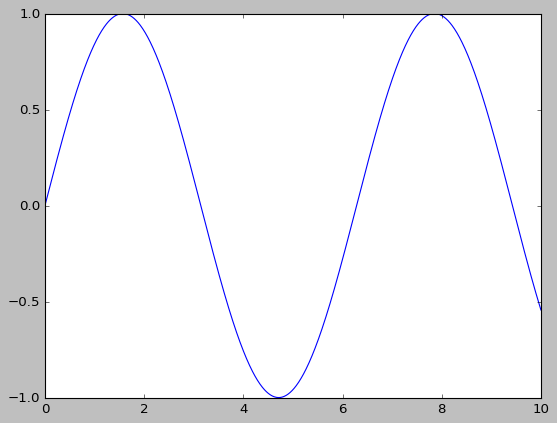

In [25]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

另外也可以用 pylab 接口画图，这时图形与坐标轴都在底层执行

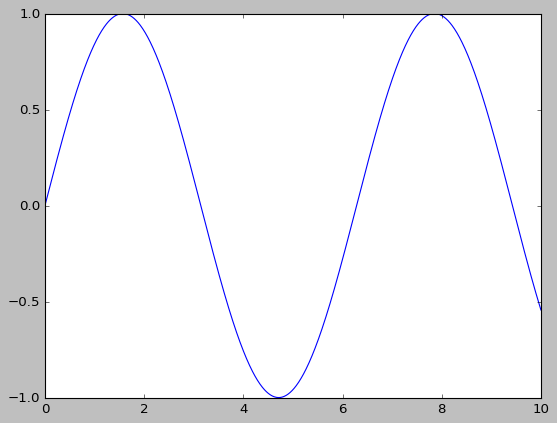

In [26]:
plt.plot(x, np.sin(x));

如果想在一张图中创建多条线，可以重复调用 plot 命令

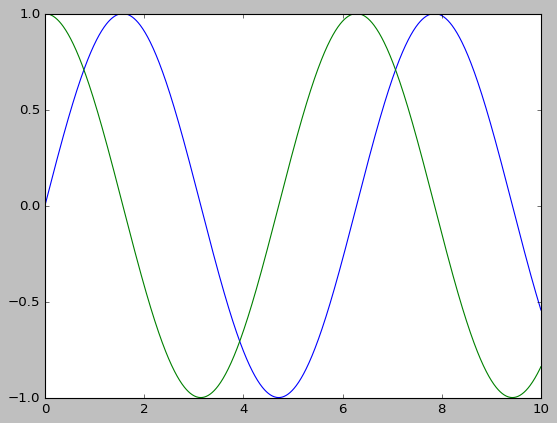

In [27]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

在 Matplotlib 中画简单的函数就是如此简单！下面将介绍更多关于如何控制坐标轴和线条
外观的具体配置方法。

## Adjusting the Plot: Line Colors and Styles

通常对图形的第一次调整是调整它线条的颜色与风格。plt.plot() 函数可以通过相应的参
数设置颜色与风格。要修改颜色，就可以使用 color 参数，它支持各种颜色值的字符串。
颜色的不同表示方法如下所示

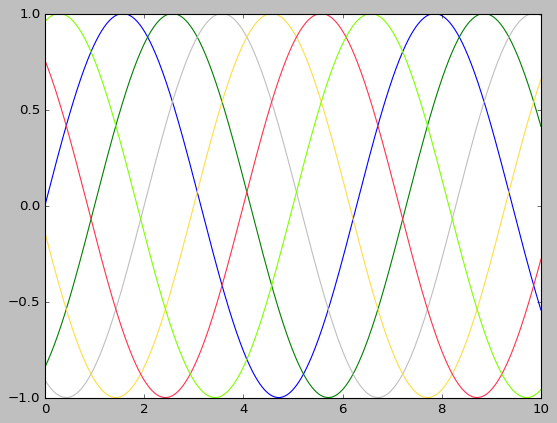

In [28]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

如果不指定颜色，Matplotlib 就会为多条线自动循环使用一组默认的颜色。

与之类似，你也可以用 linestyle 调整线条的风格

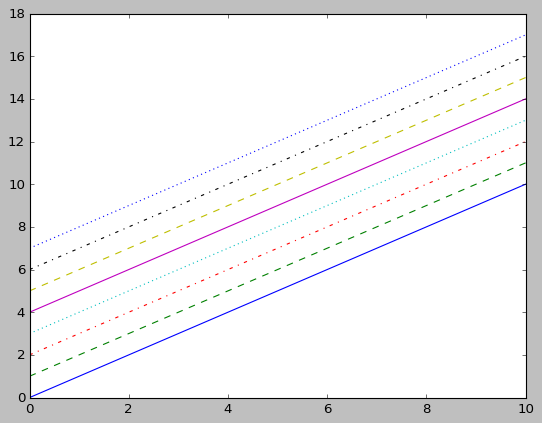

In [29]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

如果你想用一种更简洁的方式，则可以将 linestyle 和 color 编码组合起来，作为 plt.
plot() 函数的一个非关键字参数使用

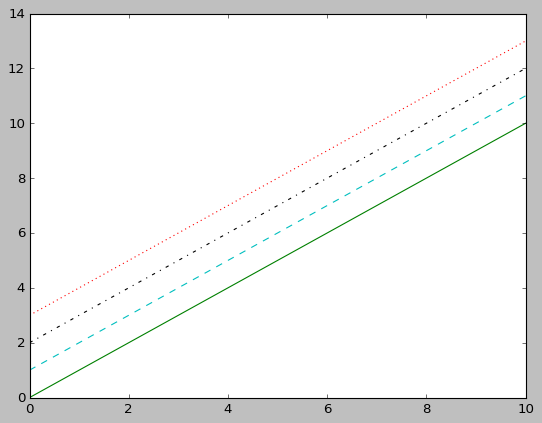

In [30]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

这些单字符颜色代码是 RGB（Red/Green/Blue）与 CMYK（Cyan/Magenta/Yellow/blacK）
颜色系统中的标准缩写形式，通常用于数字化彩色图形。

还有很多其他用来调整图像的关键字参数。若想了解更多的细节，建议你用 IPython 的帮
助工具查看 plt.plot() 函数的程序文档

## Adjusting the Plot: Axes Limits

虽然 Matplotlib 会自动为你的图形选择最合适的坐标轴上下限，但是有时自定义坐标轴上
下限可能会更好。调整坐标轴上下限最基础的方法是 plt.xlim() 和 plt.ylim()

(-1.5, 1.5)

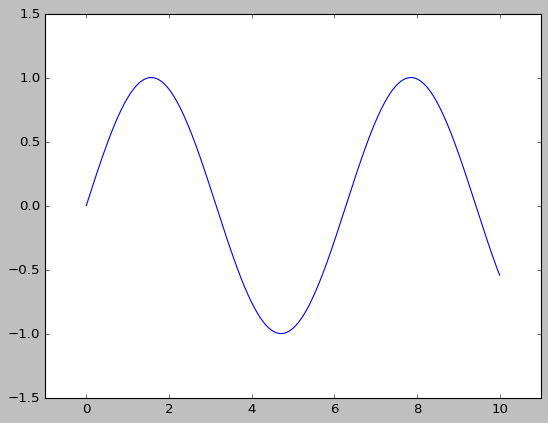

In [33]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

如果你想要让坐标轴逆序显示，那么也可以逆序设置坐标轴刻度值

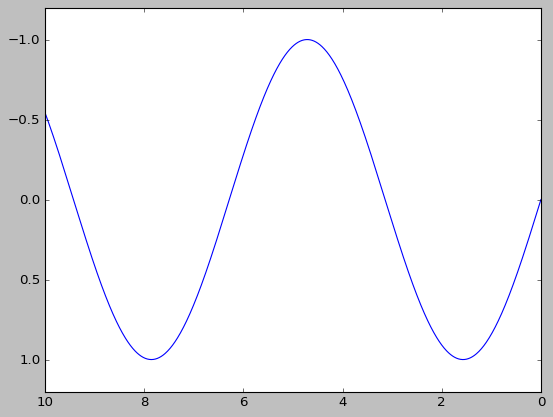

In [34]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

还有一个方法是 plt.axis()（注意不要搞混 axes 和 axis）。通过传入 [xmin, xmax,
ymin, ymax] 对应的值，plt.axis() 方法可以让你用一行代码设置 x 和 y 的限值

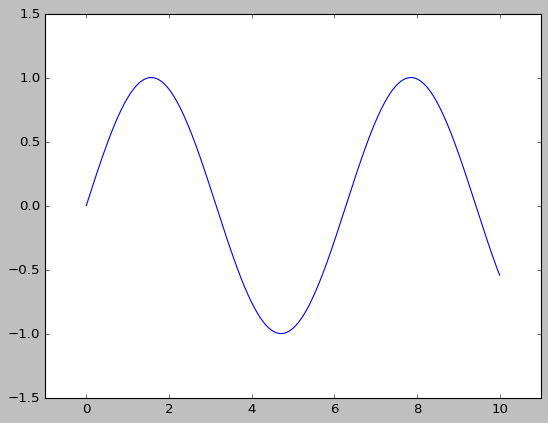

In [35]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

plt.axis() 能做的可不止如此，它还可以按照图形的内容自动收紧坐标轴，不留空白区域

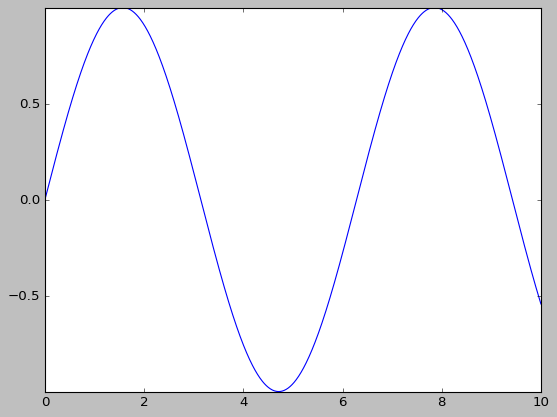

In [36]:
plt.plot(x, np.sin(x))
plt.axis('tight');

你还可以实现更高级的配置，例如让屏幕上显示的图形分辨率为 1:1，x 轴单位长度与 y 轴
单位长度相等

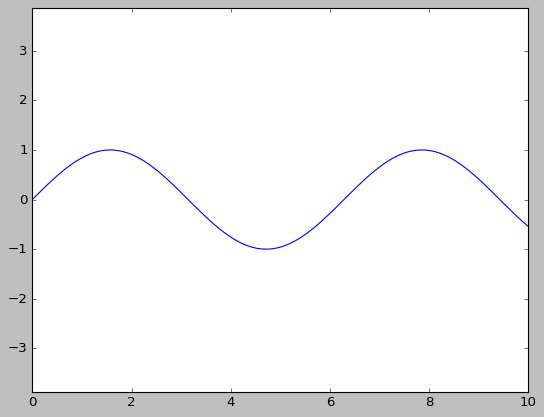

In [37]:
plt.plot(x, np.sin(x))
plt.axis('equal');

关于 plt.axis() 方法设置坐标轴上下限和其他更多功能，请参考 plt.axis() 的程序文档。

## Labeling Plots

本节的最后一部分将简要介绍设置图形标签的方法：图形标题、坐标轴标题、简易图例。

图形标题与坐标轴标题是最简单的标签，快速设置方法如下所示

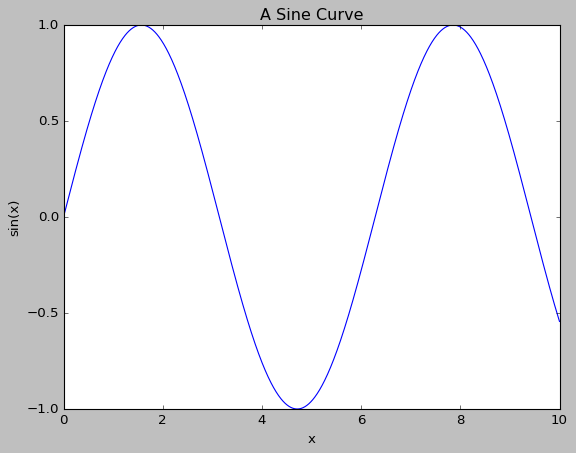

In [38]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

你可以通过优化参数来调整这些标签的位置、大小和风格。若想获取更多的信息，请参考
Matplotlib 文档和对应函数的程序文档。

在单个坐标轴上显示多条线时，创建图例显示每条线是很有效的方法。Matplotlib 内置了
一个简单快速的方法，可以用来创建图例，那就是（估计你也猜到了）plt.legend()。虽
然有不少用来设置图例的办法，但我觉得还是在 plt.plot 函数中用 label 参数为每条线设
置一个标签最简单

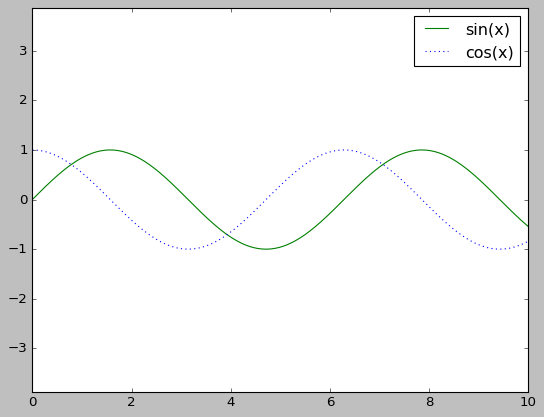

In [42]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

你会发现，plt.legend() 函数会将每条线的标签与其风格、颜色自动匹配。关于通过 plt.
legend() 设置图例的更多信息，请参考相应的程序文档。

# Simple Scatter Plots

另一种常用的图形是简易散点图（scatter plot），与线形图类似。这种图形不再由线段连接，
而是由独立的点、圆圈或其他形状构成。开始的时候同样需要在 Notebook 中导入函数：

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Scatter Plots with ``plt.plot``

上一节介绍了用 plt.plot/ax.plot 画线形图的方法，现在用这些函数来画散点图

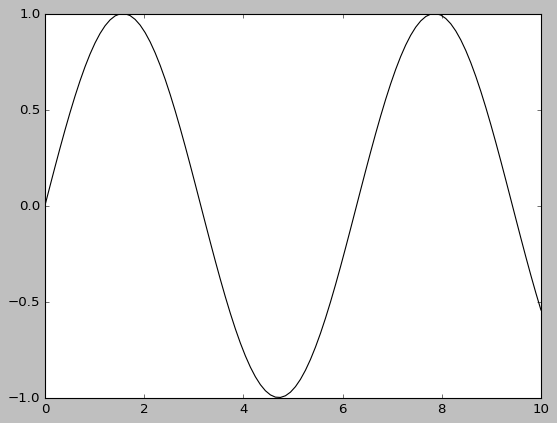

In [56]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, '-', color='black');

函数的第三个参数是一个字符，表示图形符号的类型。与你之前用 '-' 和 '--' 设置线条属
性类似，对应的图形标记也有缩写形式。所有的缩写形式都可以在 plt.plot 文档中查到，
也可以参考 Matplotlib 的在线文档。绝大部分图形标记都非常直观，我们在这里演示一部分

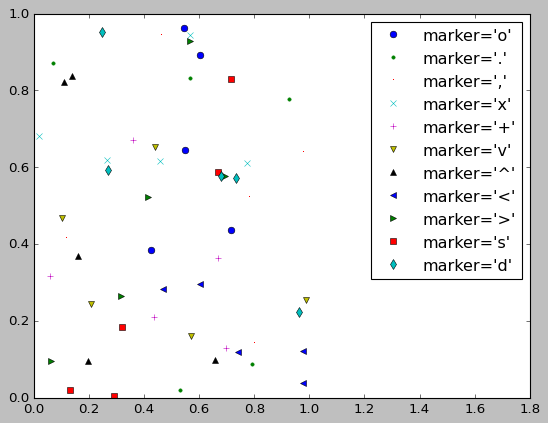

In [54]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

这些代码还可以与线条、颜色代码组合起来，画出一条连接散点的线

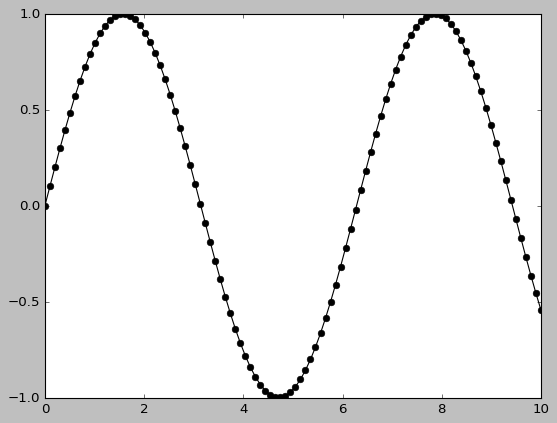

In [61]:
plt.plot(x, y, '-ok');

另外，plt.plot 支持许多设置线条和散点属性的参数

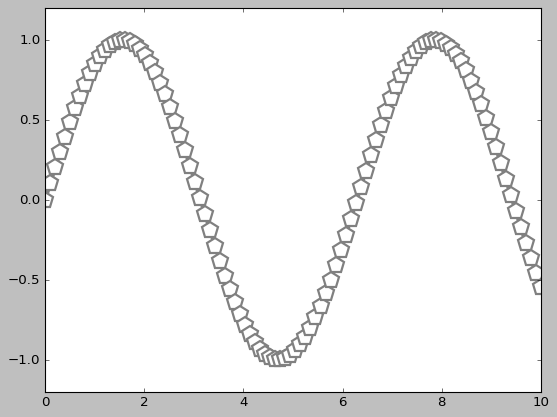

In [62]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

plt.plot 函数非常灵活，可以满足各种不同的可视化配置需求。关于具体配置的完整描
述，请参考 plt.plot 文档。

## Scatter Plots with ``plt.scatter``

另一个可以创建散点图的函数是 plt.scatter。它的功能非常强大，其用法与 plt.plot 函
数类似

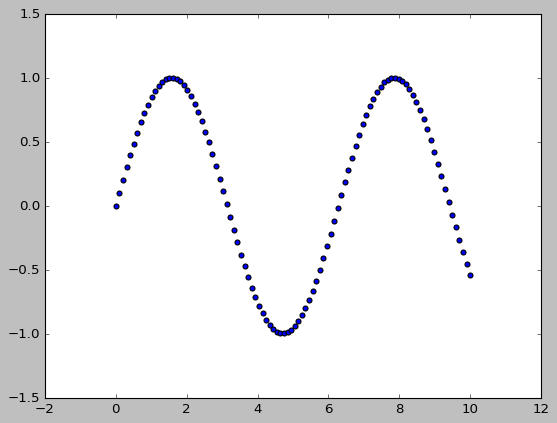

In [63]:
plt.scatter(x, y, marker='o');

plt.scatter 与 plt.plot 的主要差别在于，前者在创建散点图时具有更高的灵活性，可以
单独控制每个散点与数据匹配，也可以让每个散点具有不同的属性（大小、表面颜色、边
框颜色等）。

下面来创建一个随机散点图，里面有各种颜色和大小的散点。为了能更好地显示重叠部
分，用 alpha 参数来调整透明度

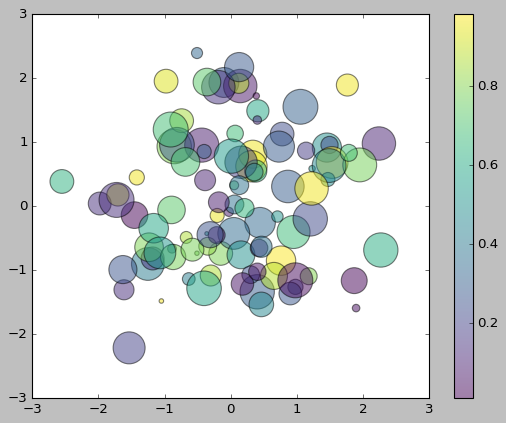

In [67]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5,
            cmap='viridis')
plt.colorbar();  # show color scale

请注意，颜色自动映射成颜色条（color scale，通过 colorbar() 显示），散点的大小以像素
为单位。这样，散点的颜色与大小就可以在可视化图中显示多维数据的信息了。

例如，可以用 Scikit-Learn 程序库里面的鸢尾花（iris）数据来演示。它里面有三种鸢尾花，
每个样本是一种花，其花瓣（petal）与花萼（sepal）的长度与宽度都经过了仔细测量

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

ModuleNotFoundError: No module named 'sklearn'

散点图可以让我们同时看到不同维度的数据：每个点的坐标值 (x, y) 分别表示花萼的长度
和宽度，而点的大小表示花瓣的宽度，三种颜色对应三种不同类型的鸢尾花。这类多颜色
与多特征的散点图在探索与演示数据时非常有用。

# Density and Contour Plots

有时在二维图上用等高线图或者彩色图来表示三维数据是个不错的方法。Matplotlib 提供
了三个函数来解决这个问题：用 plt.contour 画等高线图、用 plt.contourf 画带有填充色
的等高线图（filled contour plot）的色彩、用 plt.imshow 显示图形。这节将用这三个函数介
绍一些示例。首先打开一个 Notebook，然后导入画图需要用的函数：

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Visualizing a Three-Dimensional Function

首先用函数 z = f (x, y) 演示一个等高线图，按照下面的方式生成函数 f（在 Numpy 讲义已经介绍
过，当时用它来演示数组的广播功能）样本数据：

In [70]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

等高线图可以用 plt.contour 函数来创建。它需要三个参数：x 轴、y 轴、z 轴三个坐标
轴的网格数据。x 轴与 y 轴表示图形中的位置，而 z 轴将通过等高线的等级来表示。用
np.meshgrid 函数来准备这些数据可能是最简单的方法，它可以从一维数组构建二维网格
数据：

In [71]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

现在来看看标准的线形等高线图

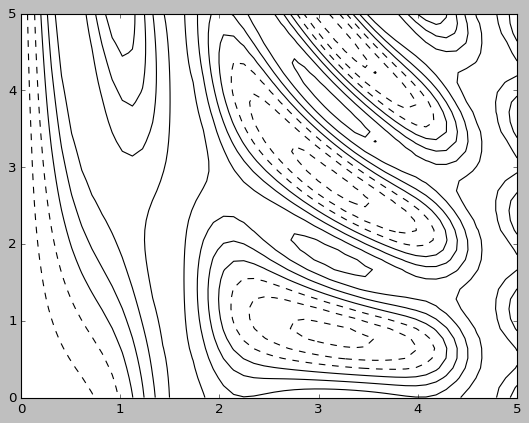

In [72]:
plt.contour(X, Y, Z, colors='black');

需要注意的是，当图形中只使用一种颜色时，默认使用虚线表示负数，使用实线表示正
数。另外，你可以用 cmap 参数设置一个线条配色方案来自定义颜色。还可以让更多的线
条显示不同的颜色——可以将数据范围等分为 20 份，然后用不同的颜色表示

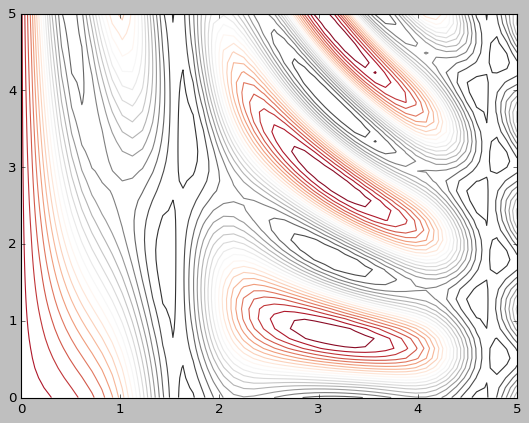

In [73]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

现在使用 RdGy（红 - 灰，Red-Gray 的缩写）配色方案，这对于数据集中度的显示效果比较
好。Matplotlib 有非常丰富的配色方案，你可以在 IPython 里用 Tab 键浏览 plt.cm 模块对
应的信息：

```
plt.cm.<TAB>
```

虽然这幅图看起来漂亮多了，但是线条之间的间隙还是有点大 。我们可以通过 plt.contourf()
函数来填充等高线图（需要注意结尾有字母 f），它的语法和 plt.contour() 是一样的。

另外还可以通过 plt.colorbar() 命令自动创建一个表示图形各种颜色对应标签信息的颜色条

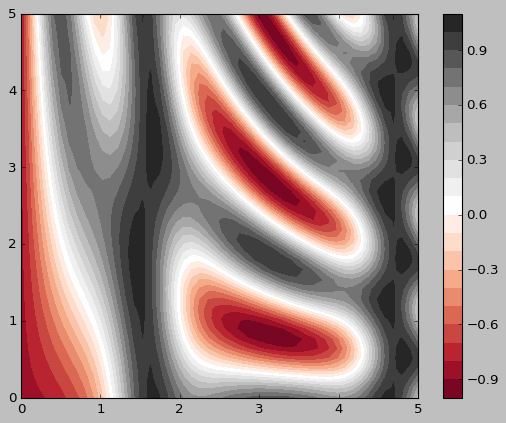

In [74]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

通过颜色条可以清晰地看出，黑色区域是“波峰”（peak），红色区域是“波谷”（valley）。

但是图形还有一点不尽如人意的地方，就是看起来有点儿“污渍斑斑”，不是那么干净。
这是由于颜色的改变是一个离散而非连续的过程，这并不是我们想要的效果。你当然可以
通过将等高线的数量设置得非常多来解决这个问题，但是最终获得的图形性能会很不好，
因为 Matplotlib 必须渲染每一级的等高线。其实有更好的做法，那就是通过 plt.imshow()
函数来处理，它可以将二维数组渲染成渐变图。

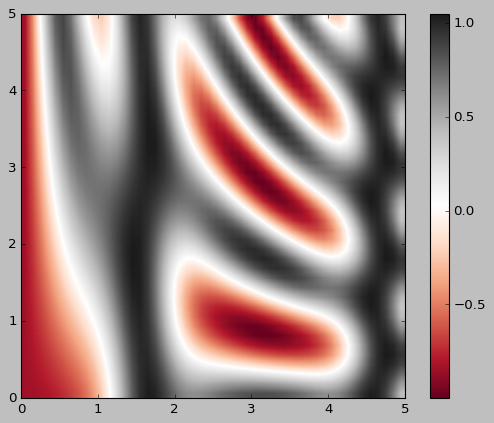

In [75]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis();

但是，使用 imshow() 函数时有一些注意事项。

- plt.imshow() 不支持用 x 轴和 y 轴数据设置网格，而是必须通过 extent 参数设置图形的坐标范围 [xmin, xmax, ymin, ymax]。
- plt.imshow() 默认使用标准的图形数组定义，就是原点位于左上角（浏览器都是如此），而不是绝大多数等高线图中使用的左下角。这一点在显示网格数据图形的时候必须调整。
- plt.imshow() 会 自 动 调 整 坐 标 轴 的 精 度 以 适 应 数 据 显 示。 你 可 以 通 过 plt.axis(aspect='image') 来设置 x 轴与 y 轴的单位。

最后还有一个可能会用到的方法，就是将等高线图与彩色图组合起来。例如，如果我们想
创建下图的效果，就需要用一幅背景色半透明的彩色图（可以通过 alpha 参数设置透
明度），与另一幅坐标轴相同、带数据标签的等高线图叠放在一起（用 plt.clabel() 函数
实现）

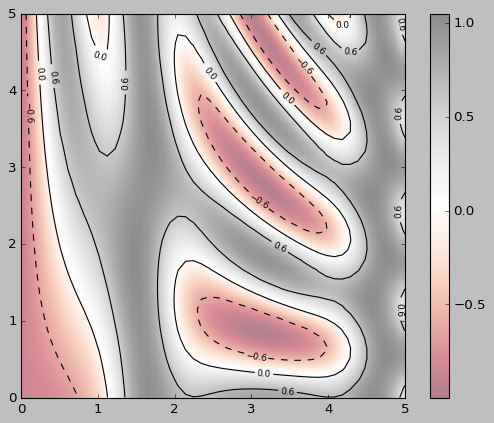

In [76]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

将 plt.contour、plt.contourf 与 plt.imshow 这三个函数组合起来之后，就打开了用二维
图画三维数据的无尽可能。关于这些函数的更多信息，请参考相应的程序文档。

# Histograms, Binnings, and Density

一个简易的频次直方图可以是理解数据集的良好开端。在前面的内容中，我们见过了
Matplotlib 的频次直方图函数（详情请参见 2.6 节）。只要导入了画图的函数，只用一行代
码就可以创建一个简易的频次直方图

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)
print(data.shape, np.max(data), np.min(data))

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [79]:
plt.hist(data);

NameError: name 'data' is not defined

hist() 有许多用来调整计算过程和显示效果的选项，下面是一个更加个性化的频次直方图

In [80]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

NameError: name 'data' is not defined

关于 plt.hist 自定义选项的更多内容都在它的程序文档中。我发现在用频次直方图对不同
分布特征的样本进行对比时，将 histtype='stepfilled' 与透明性设置参数 alpha 搭配使用
的效果非常好

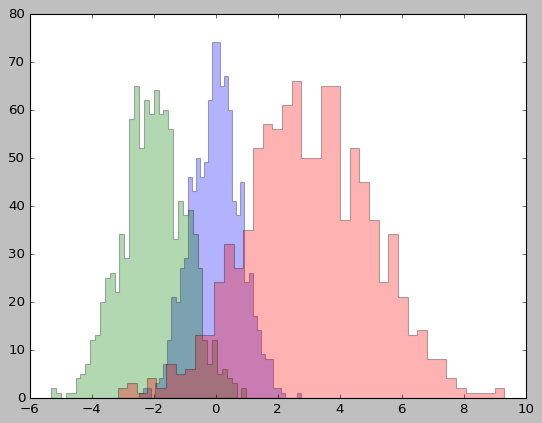

In [82]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs);
plt.hist(x2, **kwargs);
plt.hist(x3, **kwargs);

如果你只需要简单地计算频次直方图（就是计算每段区间的样本数），而并不想画图显示
它们，那么可以直接用 np.histogram()：

In [83]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

NameError: name 'data' is not defined

## Two-Dimensional Histograms and Binnings

就像将一维数组分为区间创建一维频次直方图一样，我们也可以将二维数组按照二维区
间进行切分，来创建二维频次直方图。下面将简单介绍几种创建二维频次直方图的方法。
首先，用一个多元高斯分布（multivariate Gaussian distribution）生成 x 轴与 y 轴的样本
数据：

In [84]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
print(x, y)

[-2.21922194 -0.91059761  0.78672119 ... -1.84376118  0.61788481
  0.18897669] [-2.36052574 -0.94508603 -1.77831848 ... -2.0644923   1.61471145
 -1.25016601]


### ``plt.hist2d``: Two-dimensional histogram

画二维频次直方图最简单的方法就是使用 Matplotlib 的 plt.hist2d 函数

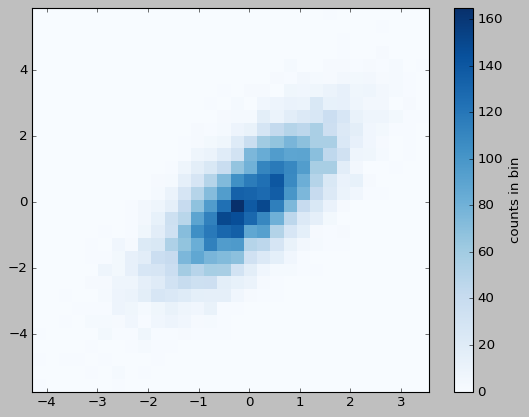

In [85]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

与 plt.hist 函数一样，plt.hist2d 也有许多调整图形与区间划分的配置选项，详细内容都
在程序文档中。另外，就像 plt.hist 有一个只计算结果不画图的 np.histogram 函数一样，
plt.hist2d 类似的函数是 np.histogram2d，其用法如下所示：

In [86]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

关于二维以上的频次直方图区间划分方法的具体内容，请参考 np.histogramdd 函数的程序文档。

### ``plt.hexbin``: Hexagonal binnings

二维频次直方图是由与坐标轴正交的方块分割而成的，还有一种常用的方式是用正六边
形分割。Matplotlib 提供了 plt.hexbin 满足此类需求，将二维数据集分割成蜂窝状

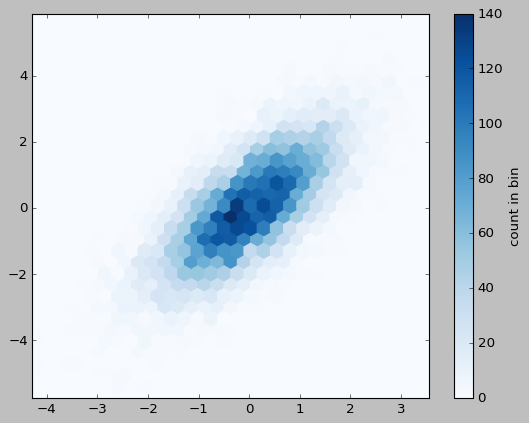

In [87]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

plt.hexbin 同样也有一大堆有趣的配置选项，包括为每个数据点设置不同的权重，以及用
任意 NumPy 累计函数改变每个六边形区间划分的结果（权重均值、标准差等指标）。